<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/DeepLearning/DL_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DL_day2 리뷰

In [ ]:
#Fashion MNIST

import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist  
#load_data() - numpy 어레이의 튜플을 반환 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images[0])
print(train_labels[0])
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
#훈련/테스트 데이터들을 0.0~1.0 사이에 값을 갖도록 변환
train_images, test_images = train_images / 255.0, test_images / 255.0

#모델 구성 (1차원 변환, 은닉층1의 units는 512, 활성화함수 = relu, 은닉층2의 units는 10, 활성화함수 = softmax)
#tf.keras.layers.Flatten 클래스
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#모델 컴파일(옵티마이저 adam, 손실 함수 sparse_categorical_crossentropy, 지표 accuracy)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#모델 훈련, fit() 메서드에 훈련에 사용할 이미지 데이터와 레이블을 입력
model.fit(train_images, train_labels, epochs=10)

#테스트 모델의 정확도 출력 - 손실(loss)과 정확도(accuracy)
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5865 - accuracy: 0.7944
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3691 - accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3203 - accuracy: 0.8824
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2995 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2744 - accuracy: 0.8992
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2657 - accuracy: 0.9005
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2524 - accuracy: 0.9090
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2345 - accuracy: 0.9133
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2319 - accuracy: 0.9107
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3189 

In [ ]:
#예측 (test_images)
import numpy as np

predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

[1.3935868e-08 1.8625101e-09 2.7865275e-07 5.9172720e-09 5.4822880e-09
 4.0558493e-04 5.8286736e-07 2.8424198e-02 7.3995614e-09 9.7116929e-01]
9


In [ ]:
#뉴런 갯수의 영향 확인하기

#모델 구성 (1차원 변환, 은닉층1의 units는 128, 활성화함수 = relu, 은닉층2의 units는 10, 활성화함수 = softmax)
#tf.keras.layers.Flatten 클래스
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),  #512에서 128로 조정
    tf.keras.layers.Dense(10, activation='softmax')
])

#모델 컴파일(옵티마이저 adam, 손실 함수 sparse_categorical_crossentropy, 지표 accuracy)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#모델 훈련, fit() 메서드에 훈련에 사용할 이미지 데이터와 레이블을 입력
model.fit(train_images, train_labels, epochs=10)

#테스트 모델의 정확도 출력 - 손실(loss)과 정확도(accuracy)
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6343 - accuracy: 0.7786
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3872 - accuracy: 0.8605
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3344 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3084 - accuracy: 0.8880
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2918 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2776 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2645 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2488 - accuracy: 0.9067
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2465 - accuracy: 0.9089
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3349 

• 뉴런 노드의 개수가 증가하면 훈련 과정에서 손실 값이 감소하고 테스트 정확도는 증가하는 경향

뉴런 512개의 정확률 0.8895999789237976  

뉴런 128개의 정확률 0.8841000199317932

In [ ]:
#tf.keras.callbacks 모듈의 Callback 클래스를 사용하면, 훈련 중에 손실 값이 특정 기준 미만이 되었을 때 훈련을 중단할 수 있습니다.

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if logs.get('loss') < 0.25:  #손실값이 0.25이하일 때 
          print('\n훈련을 중지합니다.')
          self.model.stop_training = True  #훈련 중단

callbacks = myCallback()


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5852 - accuracy: 0.7945
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3722 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3232 - accuracy: 0.8805
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2946 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2797 - accuracy: 0.8967
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2628 - accuracy: 0.9023
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2493 - accuracy: 0.9058
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2357 - accuracy: 0.9104

훈련을 중지합니다.


### 합성곱 신경망

• 합성곱 신경망 (Convolutional neural network, CNN) - 시각적 이미지 분석 및 분류에 가장 일반적으로 사용되는 인공신경망

• 합성곱 층 Conv2D():  
합성곱 연산에서 사용되는 필터는 이미지에서 특징을 분리해내는 기능을 수행 (filters 인수에 합성곱에 사용되는 필터의 개수, 출력 공간의 차원 설정)    
kernel_size : 필터 (=커널)의 크기  

• 풀링(pooling)은  합성곱에 의해 얻어진 Features map으로부터 값을 샘플링해서 정보를 압축하는 과정  

Max pooling 층 MaxPooling2D - 특정 영역에서 가장 큰 값을 샘플링하는 풀링 방식  
strides 인수는 풀링 필터를 이동시키는 간격 설정

28x28 이미지 > 합성곱 필터 (3x3) > 26x26 Feature map > 풀링 필터 strides 2 > 13x13 

summary() - 구성한 신경망에 대한 정보를 출력

• 합성곱, 풀링 층은 특성 추출을 담당하며, 전체 합성곱 신경망의 앞부분을 구성합니다  
합성곱 층에 이어 뒷부분에는 분류를 담당하는 Dense 층 (Fully-connected layer)을 구성


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 1. MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 2. 데이터 전처리하기
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 3. 합성곱 신경망 구성하기
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# 4. Dense 층 추가하기
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)               

In [ ]:
# 5. 모델 컴파일하기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 6. 훈련하기
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 34s 2ms/step - loss: 0.4619 - accuracy: 0.8577
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0716 - accuracy: 0.9780
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0524 - accuracy: 0.9842
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0392 - accuracy: 0.9880
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0333 - accuracy: 0.9898


In [ ]:
# 7. 모델 평가하기
loss, acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.0442 - accuracy: 0.9865


###DL_day3 시작

이미지 분류 실습

말과 사람 이미지 분류하기


In [ ]:
import os

# horses/humans 데이터셋 경로 지정
train_horse_dir = '/content/drive/MyDrive/horse-or-human/horses'
train_human_dir = '/content/drive/MyDrive/horse-or-human/humans'

# horses 파일 이름 리스트
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

# humans 파일 이름 리스트
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

# horses/humans 총 이미지 파일 개수
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

['horse02-3.png', 'horse02-2.png', 'horse02-1.png', 'horse02-0.png', 'horse01-9.png', 'horse01-8.png', 'horse01-7.png', 'horse01-6.png', 'horse01-5.png', 'horse01-4.png']
['human06-04.png', 'human06-03.png', 'human06-00.png', 'human05-29.png', 'human05-28.png', 'human06-01.png', 'human06-02.png', 'human05-30.png', 'human05-27.png', 'human07-12.png']
total training horse images: 500
total training human images: 527


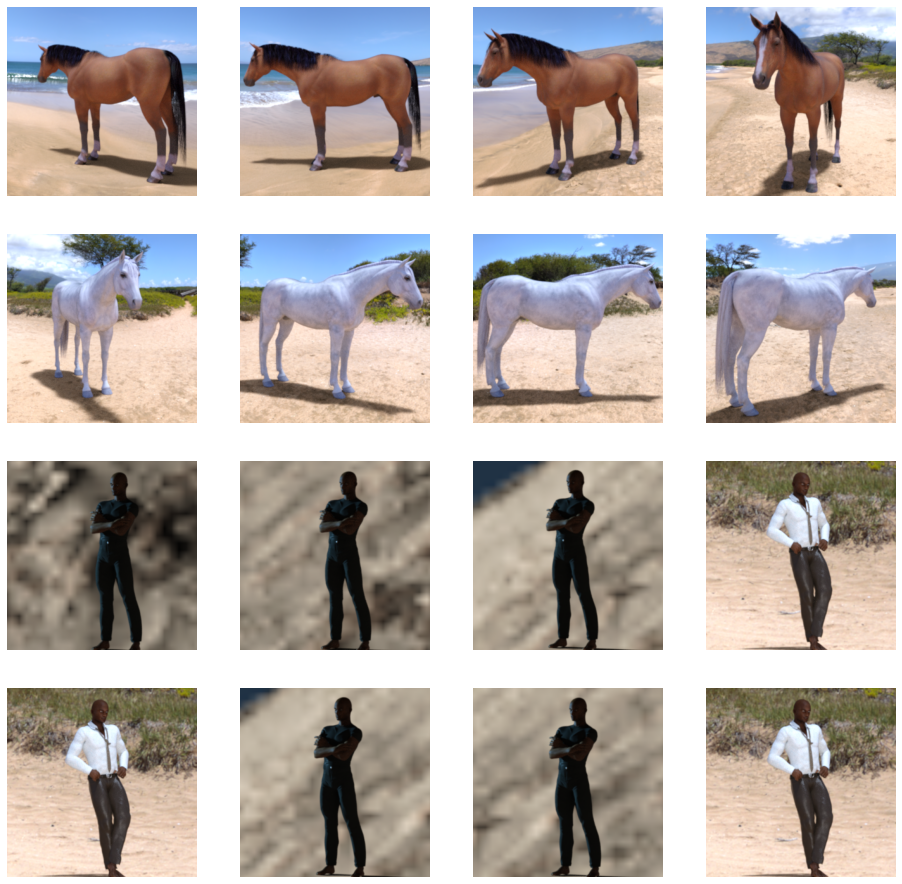

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
#모델 구성

import tensorflow as tf

model = tf.keras.models.Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    # Flatten
    tf.keras.layers.Flatten(),
    # 512 Neuron (Hidden layer)
    tf.keras.layers.Dense(512, activation='relu'),
    # 1 Output neuron
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 33, 33, 64)      

In [ ]:
#모델 컴파일
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.001),
            metrics=['accuracy'])

In [ ]:
#이미지 데이터 전처리
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
  '/content/drive/MyDrive/horse-or-human',
  target_size=(300, 300),
  batch_size=128,
  class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
#모델 훈련하기
history = model.fit(
  train_generator,
  steps_per_epoch=8,
  epochs=15,
  verbose=1
)

Epoch 1/15
8/8 [==============================] - 19s 2s/step - loss: 0.7675 - accuracy: 0.5140
Epoch 2/15
8/8 [==============================] - 7s 872ms/step - loss: 0.6382 - accuracy: 0.7103
Epoch 3/15
8/8 [==============================] - 6s 779ms/step - loss: 0.8679 - accuracy: 0.7219
Epoch 4/15
8/8 [==============================] - 6s 775ms/step - loss: 0.3710 - accuracy: 0.8780
Epoch 5/15
8/8 [==============================] - 7s 783ms/step - loss: 0.2395 - accuracy: 0.8887
Epoch 6/15
8/8 [==============================] - 6s 772ms/step - loss: 0.1175 - accuracy: 0.9580
Epoch 7/15
8/8 [==============================] - 7s 889ms/step - loss: 0.1423 - accuracy: 0.9477
Epoch 8/15
8/8 [==============================] - 6s 774ms/step - loss: 0.1811 - accuracy: 0.9245
Epoch 9/15
8/8 [==============================] - 6s 774ms/step - loss: 0.2040 - accuracy: 0.9213
Epoch 10/15
8/8 [==============================] - 6s 777ms/step - loss: 0.1739 - accuracy: 0.9246
Epoch 11/15
8/8 [====

In [47]:
# 이미지분류 2 개와 고양이

#압축풀기

import os
import zipfile

local_zip = '/content/drive/MyDrive/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/drive/MyDrive')
zip_ref.close()

In [48]:
# 기본 경로
base_dir = '/content/drive/MyDrive/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

/content/drive/MyDrive/cats_and_dogs_filtered/train/cats
/content/drive/MyDrive/cats_and_dogs_filtered/train/dogs
/content/drive/MyDrive/cats_and_dogs_filtered/validation/cats
/content/drive/MyDrive/cats_and_dogs_filtered/validation/dogs


In [49]:
#파일 이름과 개수
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.127.jpg', 'cat.126.jpg', 'cat.125.jpg', 'cat.124.jpg', 'cat.123.jpg']
['dog.127.jpg', 'dog.126.jpg', 'dog.125.jpg', 'dog.124.jpg', 'dog.123.jpg']


In [50]:
#각 경로에 있는 파일명 리스트의 길이를 통해 파일의 개수를 확인
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


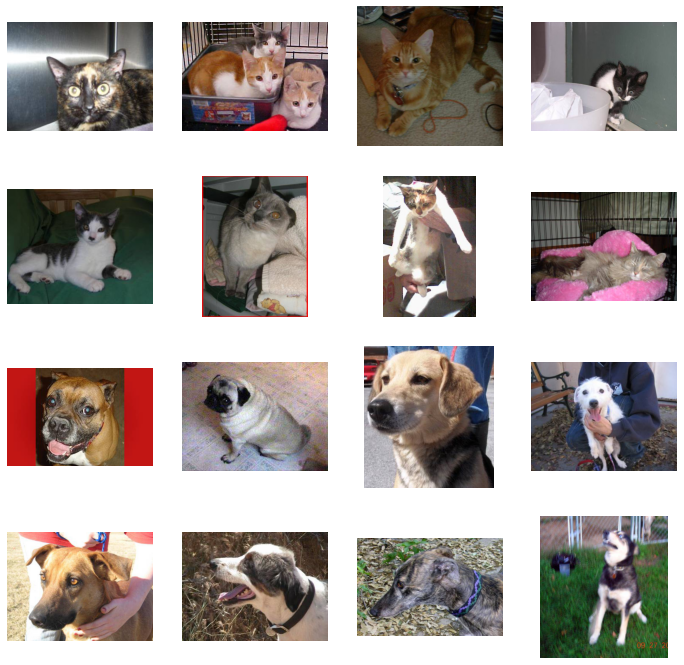

In [51]:
#이미지 확인하기
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [52]:
#모델 구성하기
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 18496)           

In [53]:
#모델 컴파일하기
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [54]:
#이미지 데이터 전처리하기

from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#모델 훈련하기

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2)
#Epoch 100/100
#100/100 - 10s - loss: 6.5194e-11 - accuracy: 1.0000 - val_loss: 6.3070 - val_accuracy: 0.7280

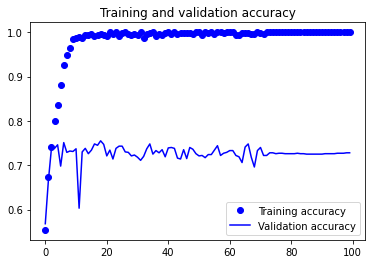

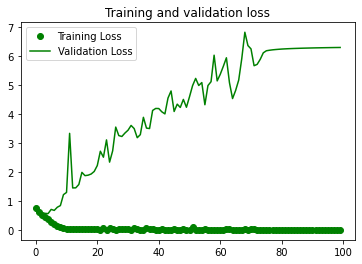

In [56]:
#정확도와 손실 확인하기
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#20회 에포크에서 훈련 정확도는 1.0에 근접한 반면, 테스트의 정확도는 100회 훈련이 끝나도 0.7 수준에 머물고 있습니다.
#이러한 현상 = 과적합

In [62]:
#테스트 이미지 분류하기

from keras.preprocessing import image

img=image.load_img('test_image.png', target_size=(150, 150))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])  #1차원으로 바꿈

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0:
  print("test_image.png is a dog")
else:
  print("test_image.png is a cat")

[1.]
test_image.png is a dog


### NLP

• National Language Processing

• 머신이 인간의 언어를 이해하고 해석하는데 더 중점을 두고 기술이 발전

• 언어를 해석하기 위한 기계 번역

• 자동으로 질문을 해석하고 답을 해주는 질의응답 시스템 등의 영역

• 텍스트 분석을 향상시키는 기반 기술

#### 텍스트 분석
• 머신러닝, 언어 이해, 통계 등을 활용해 모델을 수립하고 정보를 추출해 비즈니스 인텔리전스(Business Intelligence)나 예측 분석 등의 분석 작업을 주로 수행

• 텍스트 마이닝(Text Mining)

• 비정형 데이터에서 의미 있는 정보를 추출하는 것에 좀 더 중점을 두고 기술이 발전

#### 텍스트 분석

• 텍스트 분류(Text Classification) – Text Categorization, 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법

• 감정분석(Sentiment Analysis) – 텍스트에서 나타나는 감정/판단/믿음/의견/기분등의 주관적인 요소를 분석하는 기법   
Text Anlaytics에서 가장 활발하게 사용되고 있는 분야  
지도학습 방법, 비지도학습을 이용해 적용

• 텍스트 요약(Summarization) – 텍스트내에서 중요한 주제나 중심 사상을 추출하는 기법  
토픽 모델링(Topic Modeling)

• 텍스트 군집화(Clustering)와 유사도 측정 – 비슷한 유형의 문서에 대해 군집화를 수행하는 기법  
텍스트 분류를 비지도학습으로 수행하는 방법의 일환으로 사용될 수 있습니다.

• 텍스트 분석 수행 프로세스

1. 텍스트 전처리 : 텍스트를 피처로 만들기 전에  
클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업,
단어(Word) 등의 토큰화 작업, 의미 없는 단어(Stop word) 제거 작업,
어근 추출(Stemming/Lemmatization)등의 텍스트 정규화 작업을 수행하는 것
2. 피처 벡터화/추출 : 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당
BOW(Count기반 벡터화, TF-IDF 기반 벡터화)와 Word2Vec
3. ML 모델 수립 및 학습/예측/평가 : 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가를 수행

#### 파이썬 기반의 NLP, 텍스트 분석 패키지

• NLTK(Natural Language Toolkit for Python) : 파이썬의 가장 대표적인 NLP 패키지,
방대한 데이터 세트와 서브 모듈을 가지고 있으며 NLP의 거의 모든 영역을 커버하고 있다.  
수행 속도 측면에서 부족한 부분이 있어서 실제 대량의 데이터 기반에서는 제대로 활용되지 못하고 있습니다.  
• Gensim : 토픽 모델링 분야에서 가장 두각을 나타내는 패키지.
토픽 모델링을 쉽게 구현할 수 있는 기능을 제공해 왔으며, Word2Vec 구현 등의 다양한 신기능 제공, SpaCy와 함께 가장 많이 사용되는 NLP 패키지

• SpaCy : 뛰어난 수행 성능으로 최근 가장 주목을 받는 NLP 패키지

• 다양한 텍스트 분석이 적용돼야 하는 경우, NLTK/Gensim/SpaCy와 같은 NLP 전용 패키지와 함께 결합해 애플리케이션을 작성

####텍스트 정규화

• 사이킷런의 CountVectorizer

1. 사전 데이터 가공 - 모든 문자를 소문자로 변환하는 등의 사전 작업 수행
2. 토큰화 - Default는 단어 기준이며 n_gram_range를 반영하여 토큰화 수행
3. 텍스트 정규화 - Stop Words 필터링만 수행  
4. 피처 벡터화 - max_df, min_df, max_features 등의 파라미터를 반영하여 Token된 단어들을 feature extraction 후 vectorization 적용

In [64]:
#Count 기반 벡터화

from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [67]:
#CountVectorizer는 기본적으로 2자리 이상의 문자에 대해서만 토큰으로 인식
text=['Family is not an important thing. It`s everything.']
vect = CountVectorizer(stop_words=['the', 'a',' an', 'is', 'not'])
#vect = CountVectorizer(stop_words='english')
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1 1 1 1]]
{'family': 2, 'an': 0, 'important': 3, 'thing': 5, 'it': 4, 'everything': 1}


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['an'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [68]:
#TF-IDF 클래스로 BOW 만들기
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [69]:
#비교를 위해 CountVectorizer로 동일한 코퍼스를 벡터화
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


벡터화를 위한 희소 행렬

• 희소 행렬 – 너무 많은 불필요한 0 값이 메모리 공간에 할당되어 메모리 공간이 많이 필요, 행렬의 크기가 커서 연산 시에도 데이터 액세스를 위한 시간이 많이 소모

• 희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 변환 – COO형식과 CSR 형식

• COO(Coordinate)형식 - 0이 아닌 데이터만 별도의 데이터 배열(Array)에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식  
사이파이의 sparse패키지 - 희소 행렬 변환을 위한 다양한 모듈을 제공

• CSR(Compressed Sparse Row) 형식 - COO형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식  
행 위치 배열 내에 있는 고유한 값의 시작 위치만 별도의 위치 배열로 가지는 변환 방식  
고유 값의 시작 위치만 알고 있으면 얼마든지 행 위치 배열을 다시 만들 수 있어 COO 방식보다 메모리가 적게 들고 빠른 연산이 가능  
사이파이의 csr_matrix 클래스를 이용하여 변환

In [75]:
#COO 형식을 활용해 원본 행렬을 변환 실습
from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

print(type(sparse_coo))
print(sparse_coo)
dense01=sparse_coo.toarray()
print(type(dense01),"\n", dense01)

<class 'scipy.sparse.coo.coo_matrix'>
  (0, 0)	3
  (0, 2)	1
  (1, 1)	2
<class 'numpy.ndarray'> 
 [[3 0 1]
 [0 2 0]]


In [81]:
#희소 행렬 - CSR 형식
from scipy import sparse
dense2 = np.array([[0,0,1,0,0,5],
[1,4,0,3,2,5],
[0,6,0,3,0,0],
[2,0,0,0,0,0],
[0,0,0,7,0,8],
[1,0,0,0,0,0]])
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1]) # 0 이 아닌 데이터 추출
# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos))) # COO 형식으로 변환
print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo)

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])
# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr)

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1


In [83]:
print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [2]:
#텍스트 분류 실습 – 20 뉴스 그룹 분류
#사이킷런 fetch_20newsgroup() API를 이용 뉴스그룹의 분류

from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all', random_state=156)
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [3]:
#Target 클래스가 어떻게 구성돼 있는지 확인
import pandas as pd
print('target 클래스의 값과 분포도 \n', pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
#첫 번재 기사 확인
print(news_data.data[1])

#확인 결과 뉴스그룹 기사의 내용뿐만 아니라 뉴스그룹 제목, 작성자, 소속, 이메일 등의 다양한 정보를 가지고 있음

In [4]:
#불필요한 부분들은 remove 파라미터를 이용하여 제거
#훈련 데이터와 테스트 데이터로 분류하는 코드를 작성
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)

X_train = train_news.data
y_train = train_news.target

# subset='test'으로 테스트 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), random_state=156)

X_test = test_news.data
y_test = test_news.target

print('학습 데이터 크기 {0}, 테스트 데이터 크기 {1}'.format(len(train_news.data), len(test_news.data)))

학습 데이터 크기 11314, 테스트 데이터 크기 7532


In [5]:
#피처 벡터화 변환
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization 피처 벡터화 변환 진행
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)

X_train_cnt_vect = cnt_vect.transform(X_train)

# 테스트 데이터를 feature 벡터화 변환 수행
X_test_cnn_vect = cnt_vect.transform(X_test)

print("CountVectorizer Train Size", X_train_cnt_vect.shape) #피처 백터 size 출력
print("CountVectorizer Test Size", X_test_cnn_vect.shape) #피처 백터 size 출력

CountVectorizer Train Size (11314, 101631)
CountVectorizer Test Size (7532, 101631)


In [6]:
#머신러닝 모델 학습/예측/평가
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regresion을 이용해 분류, 정확률 출력
lr_clf = LogisticRegression(solver='lbfgs', max_iter=100)
lr_clf.fit(X_train_cnt_vect, y_train)
pred = lr_clf.predict(X_test_cnn_vect)

print('CountVectorized Logistic Regression Accuracy', accuracy_score(y_test, pred))

#ITERATIONS가 너무 많다고 결과가 나오고, 정확률도 떨어진다
#CountVectorized Logistic Regression Accuracy 0.6076739245884227

CountVectorized Logistic Regression Accuracy 0.6076739245884227


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
#TF-IDF 벡터화 
# stop words 필터링 추가 & ngram을 기본 (1, 1)에서 (1, 2)로 변경해 피처 벡터화 적용
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words="english", ngram_range=(1, 2), max_df=300)
tfidf_vect.fit(X_train)

X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)

print("TF-IDF Logistic Regression Accuracy",accuracy_score(y_test, pred))
#TF-IDF Logistic Regression의 예측 정확도는 0.692

TF-IDF Logistic Regression Accuracy 0.6922464152947424


In [9]:
#모형 업그레이드 2단계
from sklearn.model_selection import GridSearchCV

# 최적 C값 도출 튜닝 수행 / 과적합 방지용
params = {'C' : [0.01, 0.1]} # [0.01, 0.1, 1, 5, 10]
grid_cv_lr = GridSearchCV(lr_clf, param_grid=params, cv=2, scoring="accuracy", verbose=1)
grid_cv_lr.fit(X_train_tfidf_vect, y_train)
print('Logistic Regression best C parameter :', grid_cv_lr.best_params_)
# print('Logistic Regression Best C Parameter :', grid_cv_lr.best_params_)

#최적 C 값으로 학습된 grid_cv로 예측 및 정확도 평가
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.2min finished


Logistic Regression best C parameter : {'C': 0.1}
TF-IDF Vectorized Logistic Regression의 예측 정확도는 0.645
